In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix,classification_report, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/indian_liver_patient.csv")
df.shape

(583, 11)

In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [6]:
df.rename(columns={'Dataset':'target'},inplace=True)
df.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1,0.4


In [7]:
le = LabelEncoder()
le.fit(df.Gender.unique())
df['Gender'] = le.transform(df.Gender)
df.head().T

,0,1,2,3,4
Age,65.0,62.00,62.00,58.0,72.0
Gender,0.0,1.00,1.00,1.0,1.0
Total_Bilirubin,0.7,10.90,7.30,1.0,3.9
Direct_Bilirubin,0.1,5.50,4.10,0.4,2.0
Alkaline_Phosphotase,187.0,699.00,490.00,182.0,195.0
Alamine_Aminotransferase,16.0,64.00,60.00,14.0,27.0
Aspartate_Aminotransferase,18.0,100.00,68.00,20.0,59.0
Total_Protiens,6.8,7.50,7.00,6.8,7.3
Albumin,3.3,3.20,3.30,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [8]:
X = df.drop("target", axis = 1)
y = df["target"]

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(408, 10) (408,) (175, 10) (175,)


In [17]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
log_predicted= clf.predict(X_test)
y_pred= clf.predict(X_test)

logreg_score = round(clf.score(X_train, y_train) * 100, 2)
logreg_score_test = round(clf.score(X_test, y_test) * 100, 2)

print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', clf.coef_)
print('Intercept: \n', clf.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))


Logistic Regression Training Score: 
 71.81
Logistic Regression Test Score: 
 73.71
Coefficient: 
 [[-0.33286006 -0.03216236 -0.34096045 -0.72781326 -0.2911374  -1.05819371
  -0.8688211  -0.63738826  0.94328059 -0.35261766]]
Intercept: 
 [-1.55028756]
Accuracy: 
 0.7371428571428571
Confusion Matrix: 
 [[110  15]
 [ 31  19]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.78      0.88      0.83       125
           2       0.56      0.38      0.45        50

   micro avg       0.74      0.74      0.74       175
   macro avg       0.67      0.63      0.64       175
weighted avg       0.72      0.74      0.72       175



In [18]:
print("Accuracy: "+ str(clf.score(X_test,y_test)))
print("Recall: " + str(round(recall_score(y_test, y_pred),3)))
print("Precision: " + str(round(precision_score(y_test,  y_pred),3)))
print("F1-measure: " + str(round(f1_score(y_test,  y_pred),3)))

Accuracy: 0.7371428571428571
Recall: 0.88
Precision: 0.78
F1-measure: 0.827


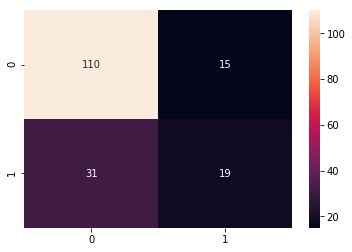

In [12]:
sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [13]:
X = df.drop("target", axis = 1)

coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(clf.coef_[0])
pd.Series(clf.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Albumin,0.943281
1,Gender,-0.032162
4,Alkaline_Phosphotase,-0.291137
0,Age,-0.332860
2,Total_Bilirubin,-0.340960
9,Albumin_and_Globulin_Ratio,-0.352618
7,Total_Protiens,-0.637388
3,Direct_Bilirubin,-0.727813
6,Aspartate_Aminotransferase,-0.868821
5,Alamine_Aminotransferase,-1.058194


In [26]:
X_train.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

Text(0.5,1,'Classification - TOP20 features (importance)')

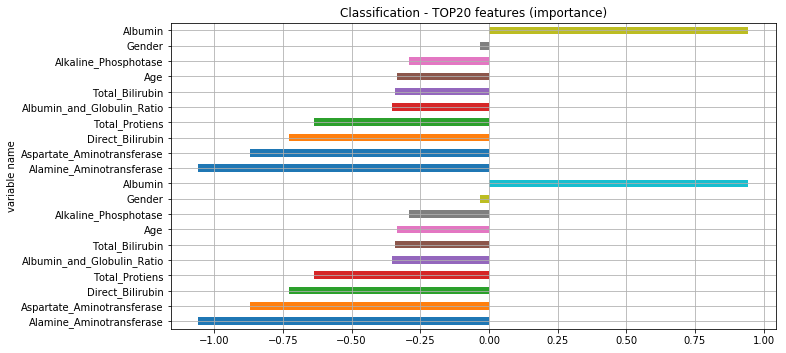

In [27]:
values = clf.coef_[0]
names = X_train.columns

importance = pd.DataFrame({"value": values, "name": names}).sort_values("value")
importance = importance.set_index("name")

# TOP20 FACTORS
top20 = pd.concat([importance["value"].head(10),importance["value"].tail(10)])

fig, ax = plt.subplots(figsize=(12,5), gridspec_kw={"top": 0.90, "bottom":0.05, "left":0.2})

top20.plot.barh(ax=ax)

plt.rcParams['axes.axisbelow'] = True
plt.ylabel("variable name")
plt.grid(True)
plt.title("Classification - TOP20 features (importance)")

In [28]:
importance

,value
name,
Alamine_Aminotransferase,-1.058194
Aspartate_Aminotransferase,-0.868821
Direct_Bilirubin,-0.727813
Total_Protiens,-0.637388
Albumin_and_Globulin_Ratio,-0.352618
Total_Bilirubin,-0.340960
Age,-0.332860
Alkaline_Phosphotase,-0.291137
Gender,-0.032162
